In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import tensorflow.keras
import sklearn
import seaborn as sns

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("x_train의 shape : ", x_train.shape)
print("y_train의 shape : ", y_train.shape)
print("x_test의 shape : ", x_test.shape)
print("y_test의 shape : ", y_test.shape)
# train 데이터는 60,000개 28 * 28 픽셀
# test 데이터는 10,000개 28 * 28 픽셀
print("x_train의 행렬 차원 : ", x_train.ndim)
print("y_train의 행렬 차원 : ",y_train.ndim)
print("x_test의 행렬 차원 : ",x_test.ndim)
print("y_test의 행렬 차원 : ",y_test.ndim)
# 이미지는 3차원 행렬, 레이블은 1차원 배열로 이루어짐

x_train의 shape :  (60000, 28, 28)
y_train의 shape :  (60000,)
x_test의 shape :  (10000, 28, 28)
y_test의 shape :  (10000,)
x_train의 행렬 차원 :  3
y_train의 행렬 차원 :  1
x_test의 행렬 차원 :  3
y_test의 행렬 차원 :  1


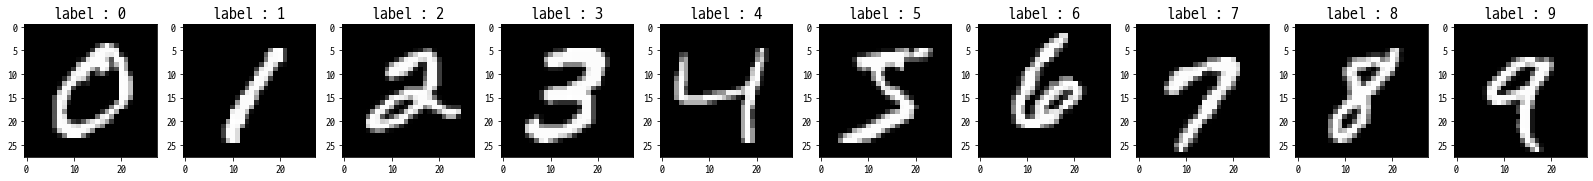

In [3]:
num_classes = 10 # 0부터 9까지의 레이블
f, ax = plt.subplots(1, num_classes, figsize = (28, 28))

# 0 - 9 레이블을 포문을 활용하여 파악
for i in range(num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap = 'gray')
    ax[i].set_title("label : {}" .format(i), fontsize = 16)

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

for i in range(num_classes):
    print(y_train[i])

In [4]:
# 정규화(0부터 1 사이의 실수로 값을 변경)를 위해 255로 나눔
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train[0].shape

(28, 28)

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print(x_train.shape, x_test.shape)

### Optimizer 발달 과정


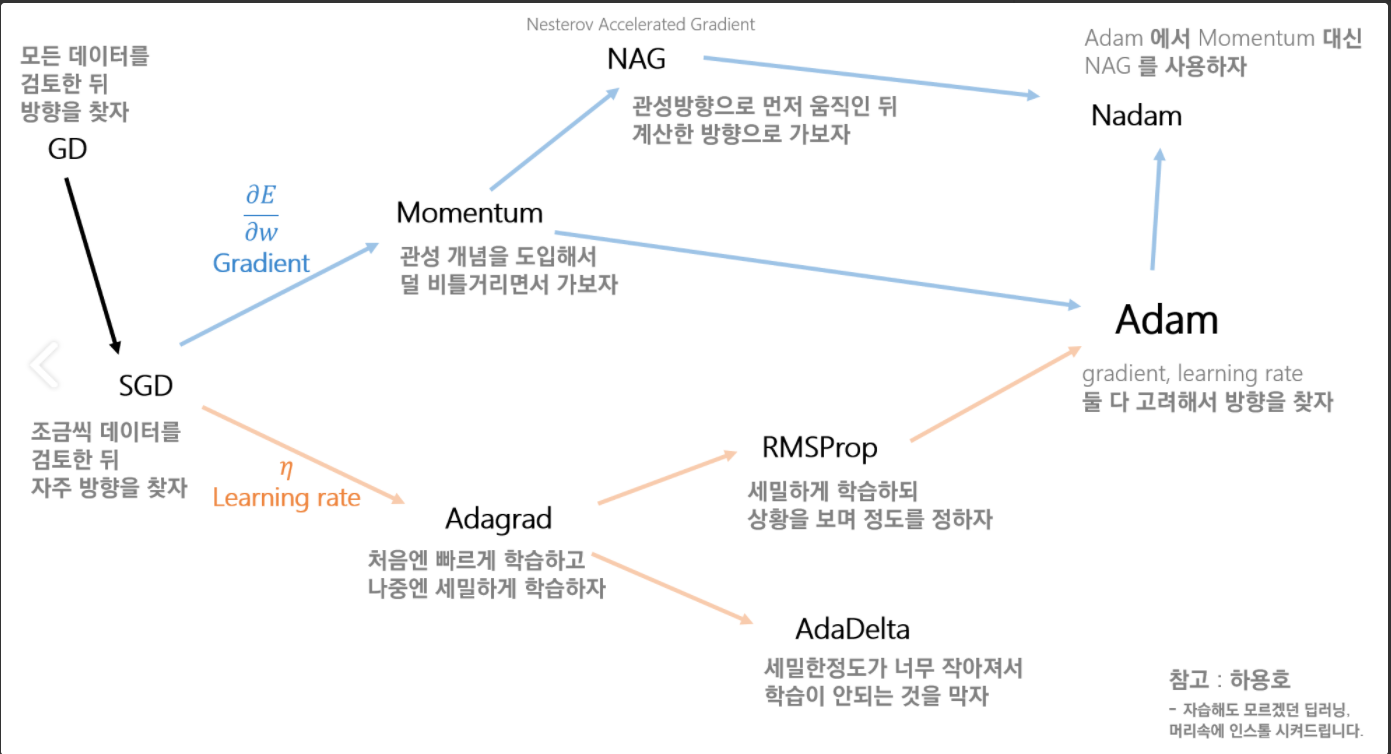

In [5]:
# 은닉층은 1개, 256개 뉴런으로 구성
# hidden layer 활성화 방법으로 시그모이드 대신
# 입력값을 민감하게 반영하는 relu 사용
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.2), # 80% 노드만 사용, overfit 방지
    tf.keras.layers.Dense(10, activation = 'softmax')
])
# 모델은 경사하강법 중 adam 알고리즘 사용
# 손실함수는 'sparse_categorical_crossentropy'
# 원핫인코딩이 아닌 정수 그대로 출력
# 원핫인코딩(피처의 갯수만큼 컬럼을 만들어서 0과 1로 채워넣는 방식)인 경우 'categorical_crossentropy' 사용

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['acc']
)
# 에폭은 10으로 설정(train데이터를 10회 돌며 학습)
history = model.fit(x_train, y_train, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 250us/sample - loss: 0.2491 - acc: 0.9280
Epoch 2/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.1157 - acc: 0.9652
Epoch 3/10
60000/60000 [==============================] - 14s 234us/sample - loss: 0.0837 - acc: 0.9747
Epoch 4/10
60000/60000 [==============================] - 14s 239us/sample - loss: 0.0659 - acc: 0.9793
Epoch 5/10
60000/60000 [==============================] - 14s 234us/sample - loss: 0.0530 - acc: 0.9829
Epoch 6/10
60000/60000 [==============================] - 23s 383us/sample - loss: 0.0453 - acc: 0.9852
Epoch 7/10
60000/60000 [==============================] - 19s 309us/sample - loss: 0.0390 - acc: 0.9872
Epoch 8/10
60000/60000 [==============================] - 14s 225us/sample - loss: 0.0351 - acc: 0.9882
Epoch 9/10
60000/60000 [==============================] - 16s 269us/sample - loss: 0.0288 - acc: 0.9904 - loss: 0.0287 -
Epoch 10/10
60000/60000 

In [6]:
# 모델 summary 확인

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 손실도와 정확도 확인을 위한 변수 설정

loss = history.history['loss']
acc = history.history['acc']
epochs = range(1, len(loss) + 1)

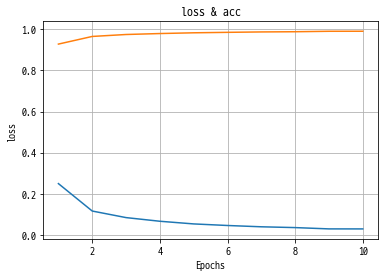

In [8]:
# 손실도와 정확도 확인

plt.plot(epochs, loss, label = 'loss')
plt.plot(epochs, acc, label = 'acc')
plt.title('loss & acc')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [9]:
# 손실도와 정확도 평가 결과
results = model.evaluate(x_test, y_test)
results

D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


[0.07310255116736808, 0.9808]

In [10]:
# test 데이터로 예측 시작

y_pred = model.predict(x_test)
print('y_pred shape : ', y_pred.shape)
print(y_pred[0])
print(y_test[0])

y_pred shape :  (10000, 10)
[1.6527852e-11 7.9396441e-11 2.6194959e-07 1.1145849e-05 2.9182362e-15
 2.8180877e-10 1.1429106e-16 9.9998796e-01 4.2614166e-11 7.3814687e-07]
7


In [11]:
# 예측값을 레이블화하여 표현하는 포문
max_value = y_pred[0][0]
max_index = 0
for index, value in enumerate(y_pred[0]):
    if value > max_value: # 정렬 알고리즘으로 최대값 찾기
        max_value = value
        max_index = index
        
print('최대값을 갖는(예측된) 레이블 : ', max_index)

최대값을 갖는(예측된) 레이블 :  7


In [18]:
# 위 포문을 지원하는 넘파이 모듈의 함수 사용
print('최대값을 갖는(예측된) 레이블 : ', np.argmax(y_pred, axis = 1))

최대값을 갖는(예측된) 레이블 :  [7 2 1 ... 4 5 6]


In [13]:
# 20개 이미지의 예측 레이블 결과 확인
for i in range(20):
    print("실제 레이블 : {}, 예측 레이블 : {}" .format(y_test[i], np.argmax(y_pred[i])))

실제 레이블 : 7, 예측 레이블 : 7
실제 레이블 : 2, 예측 레이블 : 2
실제 레이블 : 1, 예측 레이블 : 1
실제 레이블 : 0, 예측 레이블 : 0
실제 레이블 : 4, 예측 레이블 : 4
실제 레이블 : 1, 예측 레이블 : 1
실제 레이블 : 4, 예측 레이블 : 4
실제 레이블 : 9, 예측 레이블 : 9
실제 레이블 : 5, 예측 레이블 : 5
실제 레이블 : 9, 예측 레이블 : 9
실제 레이블 : 0, 예측 레이블 : 0
실제 레이블 : 6, 예측 레이블 : 6
실제 레이블 : 9, 예측 레이블 : 9
실제 레이블 : 0, 예측 레이블 : 0
실제 레이블 : 1, 예측 레이블 : 1
실제 레이블 : 5, 예측 레이블 : 5
실제 레이블 : 9, 예측 레이블 : 9
실제 레이블 : 7, 예측 레이블 : 7
실제 레이블 : 3, 예측 레이블 : 3
실제 레이블 : 4, 예측 레이블 : 4


In [14]:
# 실제 레이블과 예측 레이블이 틀린 값의 개수 확인
count = 0

for i in range(len(y_test)):
    if (y_test[i] != np.argmax(y_pred[i])):
        print("실제 레이블 : {}, 예측 레이블 : {}" .format(y_test[i], np.argmax(y_pred[i])))
        count += 1

실제 레이블 : 9, 예측 레이블 : 8
실제 레이블 : 4, 예측 레이블 : 2
실제 레이블 : 5, 예측 레이블 : 3
실제 레이블 : 3, 예측 레이블 : 7
실제 레이블 : 6, 예측 레이블 : 0
실제 레이블 : 4, 예측 레이블 : 9
실제 레이블 : 9, 예측 레이블 : 3
실제 레이블 : 8, 예측 레이블 : 2
실제 레이블 : 8, 예측 레이블 : 2
실제 레이블 : 5, 예측 레이블 : 3
실제 레이블 : 7, 예측 레이블 : 2
실제 레이블 : 8, 예측 레이블 : 4
실제 레이블 : 5, 예측 레이블 : 8
실제 레이블 : 9, 예측 레이블 : 7
실제 레이블 : 8, 예측 레이블 : 9
실제 레이블 : 5, 예측 레이블 : 4
실제 레이블 : 1, 예측 레이블 : 2
실제 레이블 : 6, 예측 레이블 : 0
실제 레이블 : 6, 예측 레이블 : 5
실제 레이블 : 7, 예측 레이블 : 2
실제 레이블 : 9, 예측 레이블 : 8
실제 레이블 : 4, 예측 레이블 : 6
실제 레이블 : 7, 예측 레이블 : 8
실제 레이블 : 6, 예측 레이블 : 1
실제 레이블 : 6, 예측 레이블 : 8
실제 레이블 : 7, 예측 레이블 : 2
실제 레이블 : 9, 예측 레이블 : 4
실제 레이블 : 4, 예측 레이블 : 9
실제 레이블 : 9, 예측 레이블 : 5
실제 레이블 : 5, 예측 레이블 : 9
실제 레이블 : 5, 예측 레이블 : 7
실제 레이블 : 8, 예측 레이블 : 3
실제 레이블 : 7, 예측 레이블 : 2
실제 레이블 : 7, 예측 레이블 : 9
실제 레이블 : 5, 예측 레이블 : 3
실제 레이블 : 8, 예측 레이블 : 4
실제 레이블 : 7, 예측 레이블 : 1
실제 레이블 : 7, 예측 레이블 : 9
실제 레이블 : 8, 예측 레이블 : 7
실제 레이블 : 4, 예측 레이블 : 2
실제 레이블 : 9, 예측 레이블 : 3
실제 레이블 : 9, 예측 레이블 : 7
실제 레이블 : 0, 예측 레이블 : 6
실제 레이블 : 3,

In [15]:
print("예측이 틀린 레이블 값의 개수 : ", count)
print("정확도 백분율 환산 : ", (1 - count/len(y_test)) * 100.0)

예측이 틀린 레이블 값의 개수 :  192
정확도 백분율 환산 :  98.08
